<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#get_documents-function" data-toc-modified-id="get_documents-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>get_documents function</a></span></li><li><span><a href="#get_featured_information-function" data-toc-modified-id="get_featured_information-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>get_featured_information function</a></span></li><li><span><a href="#Group1Tolls---Oil" data-toc-modified-id="Group1Tolls---Oil-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Group1Tolls - Oil</a></span><ul class="toc-item"><li><span><a href="#Results-level-1" data-toc-modified-id="Results-level-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Results level 1</a></span></li><li><span><a href="#Featured-level-2" data-toc-modified-id="Featured-level-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Featured level 2</a></span></li><li><span><a href="#Featured-level-3" data-toc-modified-id="Featured-level-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Featured level 3</a></span></li><li><span><a href="#Featured-level-4" data-toc-modified-id="Featured-level-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Featured level 4</a></span><ul class="toc-item"><li><span><a href="#Featured-level-4-path" data-toc-modified-id="Featured-level-4-path-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Featured level 4 path</a></span></li><li><span><a href="#Featured-level-4-documents" data-toc-modified-id="Featured-level-4-documents-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Featured level 4 documents</a></span></li></ul></li><li><span><a href="#Featured-level-5" data-toc-modified-id="Featured-level-5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Featured level 5</a></span><ul class="toc-item"><li><span><a href="#Featured-level-5-path" data-toc-modified-id="Featured-level-5-path-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Featured level 5 path</a></span></li><li><span><a href="#Featured-level-5-documents" data-toc-modified-id="Featured-level-5-documents-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Featured level 5 documents</a></span></li></ul></li><li><span><a href="#Featured-level-6" data-toc-modified-id="Featured-level-6-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Featured level 6</a></span></li></ul></li><li><span><a href="#Group1Tolls---Gas" data-toc-modified-id="Group1Tolls---Gas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Group1Tolls - Gas</a></span><ul class="toc-item"><li><span><a href="#Results-level-1" data-toc-modified-id="Results-level-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Results level 1</a></span></li><li><span><a href="#Featured-level-2" data-toc-modified-id="Featured-level-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Featured level 2</a></span></li><li><span><a href="#Featured-level-3" data-toc-modified-id="Featured-level-3-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Featured level 3</a></span></li><li><span><a href="#Featured-level-4" data-toc-modified-id="Featured-level-4-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Featured level 4</a></span><ul class="toc-item"><li><span><a href="#Featured-level-4-path" data-toc-modified-id="Featured-level-4-path-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Featured level 4 path</a></span></li><li><span><a href="#Featured-level-4-documents" data-toc-modified-id="Featured-level-4-documents-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Featured level 4 documents</a></span></li></ul></li><li><span><a href="#Featured-level-5" data-toc-modified-id="Featured-level-5-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Featured level 5</a></span><ul class="toc-item"><li><span><a href="#Featured-level-5-path" data-toc-modified-id="Featured-level-5-path-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Featured level 5 path</a></span></li><li><span><a href="#Featured-level-5-documents" data-toc-modified-id="Featured-level-5-documents-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Featured level 5 documents</a></span></li></ul></li></ul></li><li><span><a href="#Group1Tolls_all.csv" data-toc-modified-id="Group1Tolls_all.csv-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Group1Tolls_all.csv</a></span></li></ul></div>

In [1]:
#TABLEAU dashboard for this data file available: 

import pandas as pd
import queue
from requests_toolbelt.threaded import pool
import requests
from bs4 import BeautifulSoup as bs
import io
import pandas as pd
from collections import Counter
import requests
from bs4 import BeautifulSoup as bs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib import pyplot as plot

# get_documents function

In [2]:
def get_documents(source, string1, string2):
    
    jobs = queue.Queue()
    
    for x in source:
        jobs.put({'method' : 'GET', 'url' : x, 'cookies' : {'RDI-NumberOfRecords' : '200'} })
        
    p = pool.Pool(job_queue = jobs) #pooling for speed
    p.join_all()
    
    for r in p.responses():

        soup = bs(r.text, 'html.parser')
        
        try:
            text = [x.text for x in soup.find_all('a', {'class' : 'link-wait no-expand'})]
            
            url = [x['href'] for x in soup.find_all('a', {'class' : 'link-wait no-expand'})]
            url = ['https://apps.cer-rec.gc.ca' + x for x in url]
            url = [x.replace('/View', '/LoadResult') for x in url]
            
            df = pd.DataFrame({string1 + 'text': text, string1 + 'url' : url, \
                              string2 + 'url' : r.request_kwargs['url']})
            
            dfs_collector.append(df)
            
            document_download_link = [x['href'] for x in soup.find_all('a', {'class' : 'row-icon'})]
            document_name = [x.text for x in soup.find_all('a', {'class' : 'row-icon'})]
            document_date = [x.text for x in soup.find_all('td', {'class' : 'nowrap'})]
            doc_submitter = [x.text for x in soup.find_all('td', {'class' : 'col-md-2'})]

            df = pd.DataFrame({'document_name' : document_name, 'document_download_link' : document_download_link, \
                                'document_date' : document_date, 'doc_submitter' : doc_submitter, \
                                string2 + 'url' : r.request_kwargs['url']})
            dfs_collector.append(df)
            
        except:
            pass
#             print(r.request_kwargs['url']) prints that are in featured_information

# get_featured_information function

In [3]:
#this function is different than get_documents due to unique html elements in 'Feature Information' in CER CMS.
def get_featured_information(source, string1, string2):
    
    jobs = queue.Queue()
    
    for x in source:
        jobs.put({'method' : 'GET', 'url' : x, 'cookies' : {'RDI-NumberOfRecords' : '200'} })
        
    p = pool.Pool(job_queue = jobs)
    p.join_all()
    
    for r in p.responses():
        soup = bs(r.text, 'html.parser')
        
        text = [x.text for x in soup.find_all('a', {'class' : 'link-wait'})]
            
        url = [x['href'] for x in soup.find_all('a', {'class' : 'link-wait'})]
        url = ['https://apps.cer-rec.gc.ca' + x for x in url]
        url = [x.replace('/View', '/LoadResult') for x in url]
            
        df = pd.DataFrame({string1 + 'text': text, 
                            string1 + 'url' : url,
                            string2 + 'url' : r.request_kwargs['url']})
            
        dfs_collector.append(df)

# Group1Tolls - Oil

## Results level 1

In [4]:
OilGroup1Tolls_url = 'https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92835'

In [5]:
r = requests.get(OilGroup1Tolls_url, cookies = {'RDI-NumberOfRecords' : '200'})

soup = bs(r.text, 'html.parser')

l1_url = [x['href'] for x in soup.find_all('a', {'class' : 'link-wait no-expand'})]
l1_url = ['https://apps.cer-rec.gc.ca' + x for x in l1_url]
l1_url = [x.replace('View', 'LoadResult') for x in l1_url]

l1_text = [x.text for x in soup.find_all('a', {'class' : 'link-wait no-expand'})]

In [6]:
df_l1 = pd.DataFrame({'l1_text' : l1_text, 'l1_url' : l1_url})
# df_1['folder_link'] = df_1['folder_link'].str.replace('View', 'LoadResult')
df_l1.head(15)
df_l1.shape
df_l1.nunique() #all unique
df_l1.to_csv('OilGroup1Tolls_df_l1.csv', index = False)

,l1_text,l1_url
0,Cochin Pipe Lines Ltd.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155665
1,Enbridge Pipelines (NW) Inc.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/305098
2,Enbridge Pipelines Inc.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155829
3,Interprovincial Pipe Line Limited,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/93853
4,Kinder Morgan Cochin ULC,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/472901
...,...,...
8,Trans Mountain Pipe Line Company Ltd. (Name changed to Trans Mountain Pipeline Inc.),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/93854
9,Trans Mountain Pipeline Inc.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/483086
10,Trans Mountain Pipeline ULC,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/552980
11,Trans-Northern Pipelines Inc,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/93855


(13, 2)

l1_text    13
l1_url     13
dtype: int64

## Featured level 2



(27, 3)

f2_text    0
f2_url     0
f1_url     0
dtype: int64

,f2_text,f2_url,f1_url
0,Financial Regulatory Audits,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/571482,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/267614
1,Tolls and Tariffs - General Terms and Conditions,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/285616,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/267614
0,Audited Financial Statements,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/287374,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/155665
1,Quarterly Surveillance Reports,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/164040,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/155665
2,Tolls and Tariffs - General Terms & Conditions,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155577,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/155665


f2_text     8
f2_url     27
f1_url     10
dtype: int64

<AxesSubplot:title={'center':'top featured information'}>

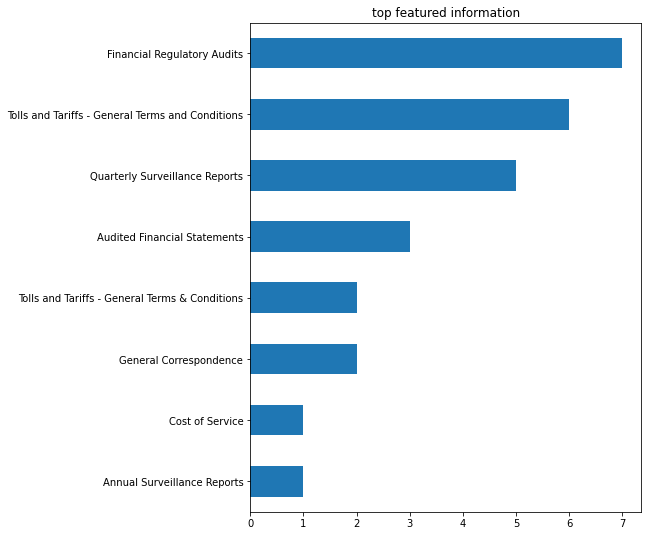

In [7]:
df_l1['f1_url'] = df_l1['l1_url'].str.replace('Result', 'Featured')

dfs_collector = []
get_featured_information(source = df_l1['f1_url'], string1 = 'f2_', string2 = 'f1_')

df_f2 = pd.concat(dfs_collector)
df_f2.shape
df_f2.isnull().sum() #no docs
df_f2.head()
df_f2.nunique()
df_f2 = df_f2.dropna(axis = 1, how = 'all')
df_f2.to_csv('OilGroup1Tolls_df_f2.csv', index = False)

df_f2['f2_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top featured information', figsize=(7, 9))

## Featured level 3

(573, 3)

f3_text    0
f3_url     0
f2_url     0
dtype: int64

,f3_text,f3_url,f2_url
0,C00840 Enbridge Pipelines Inc. - Response to NEB re. Non-compliance with Order MO-036-2017,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3810373,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3808226
1,C04175 Enbridge Pipelines Inc. - Revised Income Summary Statement for 2017 - 2018,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3898862,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3808226
0,03-07-29 Cochin Pipe Lines Ltd. - Annual Audited Financial Statments - Financial and Throuput Results Fourth Quarter 2002 (A06617),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/287373,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/287374
1,"04-08-05 Cochin Pipe Lines Ltd - Audited Financial Statements for Year Ended December 31, 2003 (A08200)",https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/333486,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/287374
2,05-08-19 Cochin Pipe Line Ltd. - 2004 Audited Statement - Financial and Throughput Results (A10377),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/377473,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/287374


<AxesSubplot:title={'center':'top level 3'}>

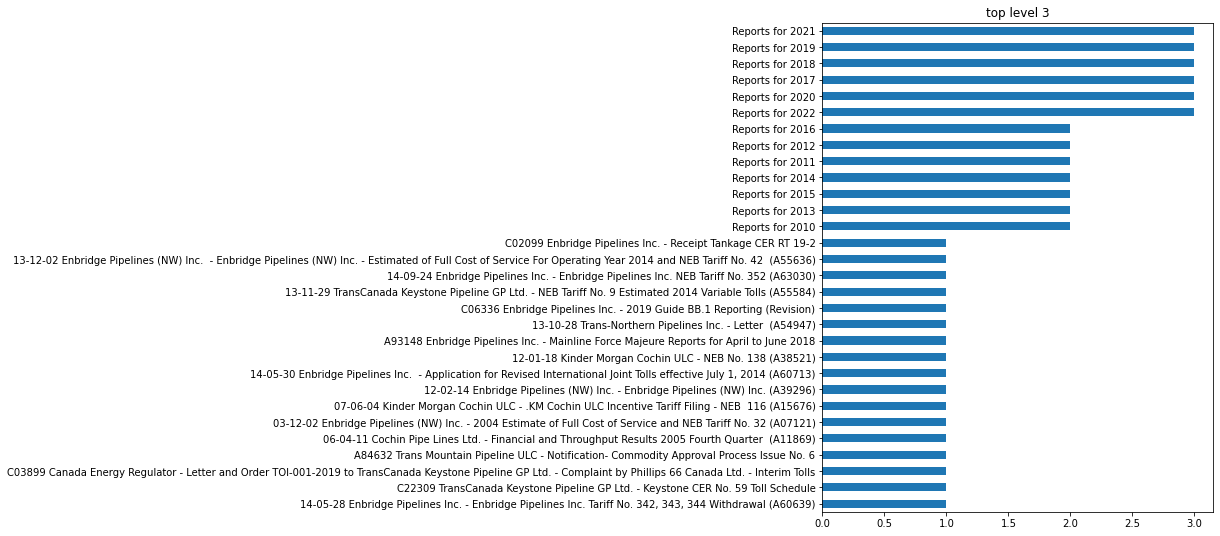

In [8]:
dfs_collector = []
get_documents(source = df_f2['f2_url'], string1 = 'f3_', string2 = 'f2_')

df_f3 = pd.concat(dfs_collector) 
df_f3.shape
df_f3.isnull().sum() #no docs
df_f3 = df_f3.dropna(axis = 1, how = 'all')
df_f3 = df_f3.drop_duplicates()
# df_f3.nunique()
df_f3.head()
df_f3.to_csv('OilGroup1Tolls_df_f3.csv', index = False)
df_f3['f3_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top level 3', figsize=(7, 9))


## Featured level 4

In [9]:
dfs_collector = []
get_documents(source = df_f3['f3_url'], string1 = 'f4_', string2 = 'f3_')


df_f4 = pd.concat(dfs_collector) 
df_f4.shape
df_f4.isnull().sum() #some docs
df_f4.nunique()
df_f4.head(1)
df_f4.to_csv('OilGroup1Tolls_df_f4.csv', index = False)
# df_f4['f4_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top featured information', figsize=(7, 9))

(2054, 7)

f4_text                   1811
f4_url                    1811
f3_url                       0
document_name              243
document_download_link     243
document_date              243
doc_submitter              243
dtype: int64

f4_text                    214
f4_url                     213
f3_url                     570
document_name             1806
document_download_link    1791
document_date              408
doc_submitter               63
dtype: int64

,f4_text,f4_url,f3_url,document_name,document_download_link,document_date,doc_submitter
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3898862,C04175-1 Enbridge Pipelines Inc. - Revised Income Summary Statement for 2017 - 2018 - Transmittal Letter - A7C7D8,/REGDOCS/File/Download/3899243,2020-01-17,Enbridge Pipelines Inc.


### Featured level 4 path

In [10]:
df_f4_path = df_f4

df_f4_path = df_f4_path.dropna(subset = ['f4_text'])
df_f4_path = df_f4_path.dropna(axis = 1, how = 'all')
df_f4_path.shape

df_f4_path = df_f4_path.drop_duplicates()
df_f4_path.shape
df_f4_path.head(1)

(243, 3)

(214, 3)

,f4_text,f4_url,f3_url
0,A01937 - Cochin Pipe Lines Ltd - Tolls & Tariffs - Quarterly Surveillance Report / Financial Statement,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/162851,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/164041


### Featured level 4 documents

In [11]:
df_f4_doc = df_f4
df_f4_doc = df_f4_doc.dropna(subset = ['document_name']) 
df_f4_doc = df_f4_doc.dropna(axis = 1, how = 'all')

df_f4_doc = df_f4_doc.merge(df_f3)
df_f4_doc = df_f4_doc.merge(df_f2)
df_f4_doc = df_f4_doc.merge(df_l1)
df_f4_doc.shape

df_f4_doc = df_f4_doc.rename(columns={
                                  "l1_text" : "company_name", "l1_url" : "company_name_url",
                                  "f2_text": "featured_information_type", 'f2_url' : "featured_information_type_url",
                                  "f3_text" : "folder_name", "f3_url" : "folder_name_url"
                                  })

df_f4_doc['commodity'] = 'oil'
df_f4_doc.shape
df_f4_doc.head(1)
df_f4_doc_oil = df_f4_doc

(1821, 11)

(1821, 12)

,folder_name_url,document_name,document_download_link,document_date,doc_submitter,folder_name,featured_information_type_url,featured_information_type,f1_url,company_name,company_name_url,commodity
0,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3898862,C04175-1 Enbridge Pipelines Inc. - Revised Income Summary Statement for 2017 - 2018 - Transmittal Letter - A7C7D8,/REGDOCS/File/Download/3899243,2020-01-17,Enbridge Pipelines Inc.,C04175 Enbridge Pipelines Inc. - Revised Income Summary Statement for 2017 - 2018,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3808226,Audited Financial Statements,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/155829,Enbridge Pipelines Inc.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155829,oil


## Featured level 5

In [12]:
dfs_collector = []
get_documents(source = df_f4_path['f4_url'], string1 = 'f5_', string2 = 'f4_')


df_f5 = pd.concat(dfs_collector) 
df_f5.shape
df_f5.isnull().sum() #some docs
df_f5.nunique()
df_f5.head(1)
df_f5.to_csv('OilGroup1Tolls_df_f5.csv', index = False)
# df_f5['f5_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top featured information', figsize=(7, 9))

(583, 7)

f5_text                   525
f5_url                    525
f4_url                      0
document_name              58
document_download_link     58
document_date              58
doc_submitter              58
dtype: int64

f5_text                    29
f5_url                     28
f4_url                    213
document_name             525
document_download_link    509
document_date             184
doc_submitter              28
dtype: int64

,f5_text,f5_url,f4_url,document_name,document_download_link,document_date,doc_submitter
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/293365,A0J1I9 - Financial and Throughput Results for Second Quarter,/REGDOCS/File/Download/40940,2003-09-16,Cochin Pipe Lines Ltd.


### Featured level 5 path

In [13]:
df_f5_path = df_f5

df_f5_path = df_f5_path.dropna(subset = ['f5_text'])
df_f5_path = df_f5_path.dropna(axis = 1, how = 'all')
df_f5_path.shape

df_f5_path = df_f5_path.drop_duplicates()
df_f5_path.shape
df_f5_path.head(1)

(58, 3)

(29, 3)

,f5_text,f5_url,f4_url
0,04-12-01 Enbridge Pipelines Inc. - Enbridge Pipelines (NW) Inc. Tariff (A08589) Alias,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/341364,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/342167


### Featured level 5 documents

In [14]:
df_f5_doc = df_f5
df_f5_doc = df_f5_doc.dropna(subset = ['document_name']) 
df_f5_doc = df_f5_doc.dropna(axis = 1, how = 'all')
df_f5_doc = df_f5_doc.drop_duplicates()
df_f5_doc.shape

df_f5_doc = df_f5_doc.merge(df_f4_path)
df_f5_doc = df_f5_doc.merge(df_f3)
df_f5_doc = df_f5_doc.merge(df_f2)
df_f5_doc = df_f5_doc.merge(df_l1)
df_f5_doc.shape

df_f5_doc = df_f5_doc.drop_duplicates()
df_f5_doc = df_f5_doc.rename(columns={
                                  "l1_text" : "company_name", "l1_url" : "company_name_url",
                                  "f2_text": "featured_information_type", 'f2_url' : "featured_information_type_url",
                                  "f3_text" : "year", "f3_url" : "year_url",
                                  "f4_text" : "folder_name", "f4_url" : "folder_name_url",
                                  })

df_f5_doc['commodity'] = 'oil'
df_f5_doc.shape
df_f5_doc.head(1)
df_f5_doc_oil = df_f5_doc

(525, 5)

(623, 13)

(623, 14)

,folder_name_url,document_name,document_download_link,document_date,doc_submitter,folder_name,year_url,year,featured_information_type_url,featured_information_type,f1_url,company_name,company_name_url,commodity
0,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/293365,A0J1I9 - Financial and Throughput Results for Second Quarter,/REGDOCS/File/Download/40940,2003-09-16,Cochin Pipe Lines Ltd.,03-09-12 Cochin Pipe Lines Ltd. - Financial and Throughput Results for Second Quarter (A06837),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/281826,Reports for 2003,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/164040,Quarterly Surveillance Reports,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/155665,Cochin Pipe Lines Ltd.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155665,oil


## Featured level 6

In [15]:
# not pursuing this folder level. Not included in Group1Tolls_all.csv last merge.
# Applies only to Enbridge Pipelines (NW) Inc. Loop error in REGDOCS. 

dfs_collector = []
get_documents(source = df_f5_path['f5_url'], string1 = 'f6_', string2 = 'f5_')


df_f6 = pd.concat(dfs_collector) 
df_f6.shape
df_f6.isnull().sum() #some docs
# df_f6.nunique()
df_f6.head(1)
df_f6.to_csv('OilGroup1Tolls_df_f6.csv', index = False)
# df_f5['f5_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top featured information', figsize=(7, 9))

(156, 7)

f6_text                   98
f6_url                    98
f5_url                     0
document_name             58
document_download_link    58
document_date             58
doc_submitter             58
dtype: int64

,f6_text,f6_url,f5_url,document_name,document_download_link,document_date,doc_submitter
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/387411,A0S3Y1 - Enbridge Pipelines NW 2006 Estimate of Full Cost of Service and Tariff NEB No. 34 Letter,/REGDOCS/File/Download/387029,2005-12-13,Enbridge Pipelines (NW) Inc.


# Group1Tolls - Gas

## Results level 1

In [16]:
GasGroup1Tolls_url = 'https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92833'

In [17]:
r = requests.get(GasGroup1Tolls_url, cookies = {'RDI-NumberOfRecords' : '200'})

soup = bs(r.text, 'html.parser')

l1_url = [x['href'] for x in soup.find_all('a', {'class' : 'link-wait no-expand'})]
l1_url = ['https://apps.cer-rec.gc.ca' + x for x in l1_url]
l1_url = [x.replace('View', 'LoadResult') for x in l1_url]

l1_text = [x.text for x in soup.find_all('a', {'class' : 'link-wait no-expand'})]

In [18]:
df_l1 = pd.DataFrame({'l1_text' : l1_text, 'l1_url' : l1_url})
# df_1['folder_link'] = df_1['folder_link'].str.replace('View', 'LoadResult')
df_l1.head(15)
df_l1.shape
df_l1.nunique() #all unique
df_l1.to_csv('Group1Tolls_df_l1.csv', index = False)

,l1_text,l1_url
0,Alberta Natural Gas Company Ltd,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92838
1,Alliance Pipeline Ltd.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/285030
2,Cartier Pipeline and Company Limited Partnership,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/129424
3,Foothills Pipe Lines (Yukon) Ltd,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92839
4,Foothills Pipe Lines Ltd,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92840
...,...,...
8,Multi-Client,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/553405
9,NOVA Gas Transmission Ltd.,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/554137
10,TransCanada PipeLines Limited,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92843
11,TransCanada PipeLines Limited B.C. System,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155421


(13, 2)

l1_text    13
l1_url     13
dtype: int64

In [19]:
# %%time
# CPU times: user 25.2 s, sys: 1.19 s, total: 26.4 s
# Wall time: 1min 54s
dfs_collector = []
get_documents(source = df_f4_path['f4_url'], string1 = 'f5_', string2 = 'f4_')

df_f5 = pd.concat(dfs_collector) 
df_f5.shape
df_f5.isnull().sum()  
df_f5.head(10)
df_f5.to_csv('Group1Tolls_df_f5.csv', index = False)

(583, 7)

f5_text                   525
f5_url                    525
f4_url                      0
document_name              58
document_download_link     58
document_date              58
doc_submitter              58
dtype: int64

,f5_text,f5_url,f4_url,document_name,document_download_link,document_date,doc_submitter
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/283193,A0I4S8 - Financial and Throughput Results for First Quarter,/REGDOCS/File/Download/40940,2003-06-06,Cochin Pipe Lines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/283193,A0I4S9 - Receipt,/REGDOCS/File/Download/283400,2003-06-06,Cochin Pipe Lines Ltd.
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/270877,A0I0D3 - Surveillance report,/REGDOCS/File/Download/40940,2003-03-28,Cochin Pipe Lines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/270877,A0I0D4 - Receipt,/REGDOCS/File/Download/271130,2003-03-28,Cochin Pipe Lines Ltd.
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/162851,Letter (A0D3V6),/REGDOCS/File/Download/162852,2002-03-22,Cochin Pipe Lines Ltd
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/162851,Receipt (A0D3V7),/REGDOCS/File/Download/162855,2002-03-22,Cochin Pipe Lines Ltd
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/162639,Letter (A0D3U8),/REGDOCS/File/Download/162765,2002-03-22,Cochin Pipe Lines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/162639,Receipt (A0D3U9),/REGDOCS/File/Download/162640,2002-03-22,Cochin Pipe Lines Ltd.
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/293365,A0J1I9 - Financial and Throughput Results for Second Quarter,/REGDOCS/File/Download/40940,2003-09-16,Cochin Pipe Lines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/293365,A0J1J0 - Receipt,/REGDOCS/File/Download/293272,2003-09-16,Cochin Pipe Lines Ltd.


## Featured level 2

(34, 3)

f2_text    0
f2_url     0
f1_url     0
dtype: int64

,f2_text,f2_url,f1_url
0,Audited Financial Statements,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3773160,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/92840
1,Financial Audit,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/568135,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/92840
2,Gas Transportation Tariffs,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/140398,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/92840
3,Operating and Maintenance Expenses,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/304889,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/92840
4,Quarterly Surveillance Reports,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155864,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/92840


f2_text    12
f2_url     34
f1_url      9
dtype: int64

<AxesSubplot:title={'center':'top featured information'}>

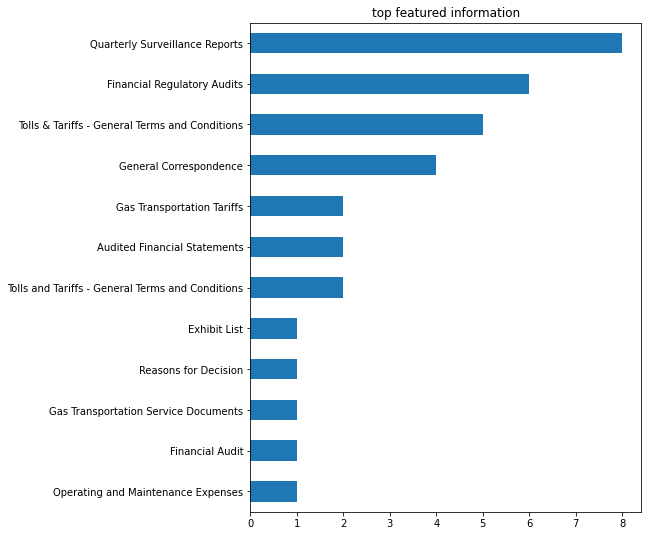

In [20]:
df_l1['f1_url'] = df_l1['l1_url'].str.replace('Result', 'Featured')

dfs_collector = []
get_featured_information(source = df_l1['f1_url'], string1 = 'f2_', string2 = 'f1_')

df_f2 = pd.concat(dfs_collector)
df_f2.shape
df_f2.isnull().sum() #no docs
df_f2.head()
df_f2.nunique()
df_f2 = df_f2.dropna(axis = 1, how = 'all')
df_f2.to_csv('Group1Tolls_df_f2.csv', index = False)

df_f2['f2_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top featured information', figsize=(7, 9))

## Featured level 3

(724, 7)

f3_text                     0
f3_url                      0
f2_url                      0
document_name             724
document_download_link    724
document_date             724
doc_submitter             724
dtype: int64

f3_text    610
f3_url     724
f2_url      32
dtype: int64

,f3_text,f3_url,f2_url
0,C05990 Foothills Pipe Lines Ltd. - Foothills 2019 Abandonment Funding Reporting,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3922798,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/3773160
0,09-09-22 NEB - Letter and Final Financial Regulatory Audit Report of Years 2007 to 2008 to Maritimes & Northeast Pipeline Management Ltd. (A22874),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/571177,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/571193
1,C20220 CER | REC - Maritimes & Northeast Pipeline Management Ltd. - Financial Regulatory Compliance Audit – Abandonment Trust Funding,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/4255636,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/571193
0,Reports for 2001,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/237019,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155864
1,Reports for 2002,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/236926,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155864


<AxesSubplot:title={'center':'top level 3'}>

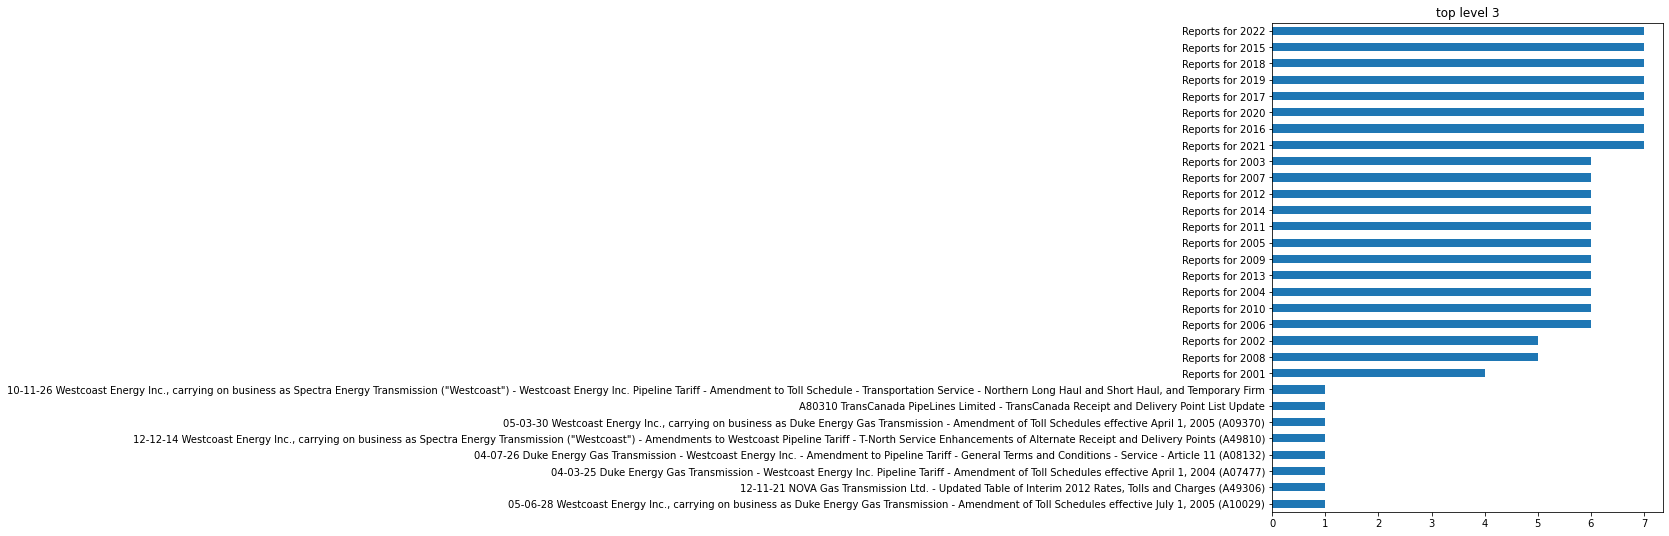

In [21]:
dfs_collector = []
get_documents(source = df_f2['f2_url'], string1 = 'f3_', string2 = 'f2_')

df_f3 = pd.concat(dfs_collector) 
df_f3.shape
df_f3.isnull().sum() #no docs
df_f3 = df_f3.dropna(axis = 1, how = 'all')
df_f3.nunique()
df_f3.head()
df_f3.to_csv('Group1Tolls_df_f3.csv', index = False)
df_f3['f3_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top level 3', figsize=(7, 9))


## Featured level 4

(1844, 7)

f4_text                   1317
f4_url                    1317
f3_url                       0
document_name              527
document_download_link     527
document_date              527
doc_submitter              527
dtype: int64

f4_text                    525
f4_url                     518
f3_url                     724
document_name             1317
document_download_link    1274
document_date              506
doc_submitter               73
dtype: int64

,f4_text,f4_url,f3_url,document_name,document_download_link,document_date,doc_submitter
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/4255636,C20220-1 Letter to Maritimes & Northeast Pipeline Management Ltd. - Financial Regulatory Compliance Audit – Abandonment Trust Funding - A8F4F5,/REGDOCS/File/Download/4255637,2022-07-25,CER | REC


<AxesSubplot:title={'center':'top featured information'}>

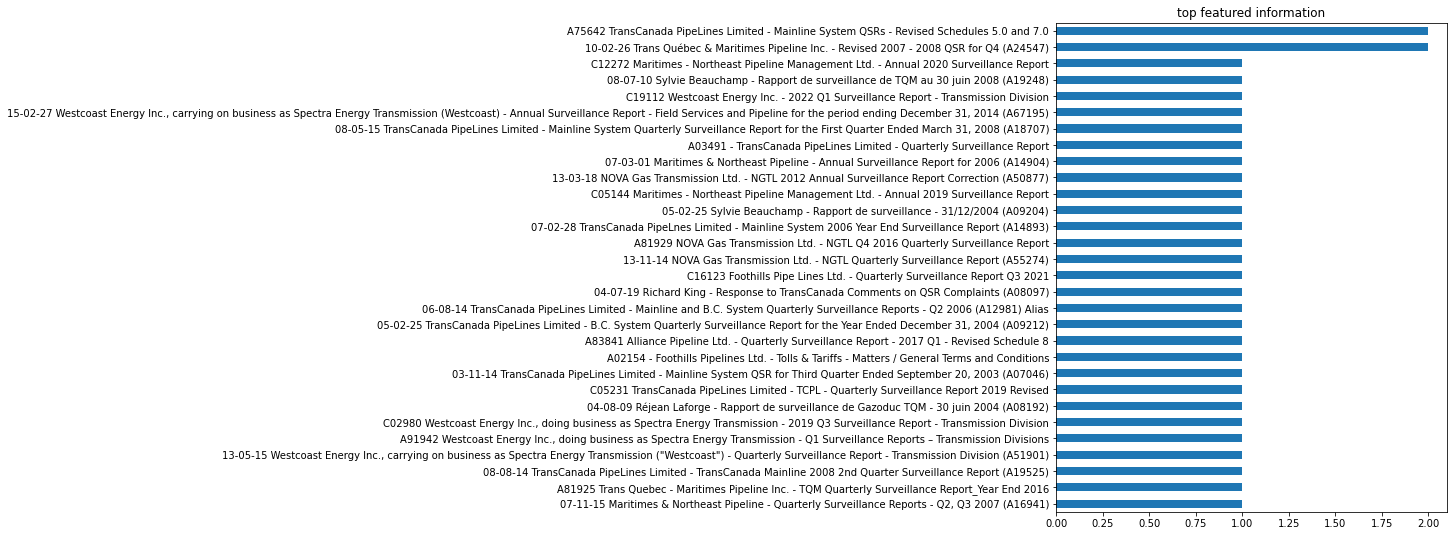

In [22]:
# %%time
# Wall time: 34 s
dfs_collector = []
get_documents(source = df_f3['f3_url'], string1 = 'f4_', string2 = 'f3_')


df_f4 = pd.concat(dfs_collector) 
df_f4.shape
df_f4.isnull().sum() #some docs
df_f4.nunique()
df_f4.head(1)
df_f4.to_csv('Group1Tolls_df_f4.csv', index = False)
df_f4['f4_text'].value_counts()[:30].sort_values(ascending = True).plot(kind = 'barh', title = 'top featured information', figsize=(7, 9))

### Featured level 4 path

In [23]:
df_f4_path = df_f4

df_f4_path = df_f4_path.dropna(subset = ['f4_text'])
df_f4_path = df_f4_path.dropna(axis = 1, how = 'all')
df_f4_path.shape

df_f4_path = df_f4_path.drop_duplicates()
df_f4_path.shape
df_f4_path.head(1)

(527, 3)

(527, 3)

,f4_text,f4_url,f3_url
0,"06-02-28 Foothills Pipe Lines Ltd. - Annual Surveillance Report for Twelve Months Ended December 31, 2005 (A11547)",https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/399751,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/399761


### Featured level 4 documents

In [24]:
df_f4_doc = df_f4
df_f4_doc = df_f4_doc.dropna(subset = ['document_name']) 
df_f4_doc = df_f4_doc.dropna(axis = 1, how = 'all')

df_f4_doc = df_f4_doc.merge(df_f3)
df_f4_doc = df_f4_doc.merge(df_f2)
df_f4_doc = df_f4_doc.merge(df_l1)
df_f4_doc.shape

df_f4_doc = df_f4_doc.rename(columns={
                                  "l1_text" : "company_name", "l1_url" : "company_name_url",
                                  "f2_text": "featured_information_type", 'f2_url' : "featured_information_type_url",
                                  "f3_text" : "folder_name", "f3_url" : "folder_name_url"
                                  })

df_f4_doc['commodity'] = 'gas'

df_f4_doc.shape
df_f4_doc.head(1)

(1317, 11)

(1317, 12)

,folder_name_url,document_name,document_download_link,document_date,doc_submitter,folder_name,featured_information_type_url,featured_information_type,f1_url,company_name,company_name_url,commodity
0,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/4255636,C20220-1 Letter to Maritimes & Northeast Pipeline Management Ltd. - Financial Regulatory Compliance Audit – Abandonment Trust Funding - A8F4F5,/REGDOCS/File/Download/4255637,2022-07-25,CER | REC,C20220 CER | REC - Maritimes & Northeast Pipeline Management Ltd. - Financial Regulatory Compliance Audit – Abandonment Trust Funding,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/571193,Financial Regulatory Audits,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/92842,Maritimes & Northeast Pipelines Ltd,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92842,gas


## Featured level 5

In [25]:
# %%time
# CPU times: user 25.2 s, sys: 1.19 s, total: 26.4 s
# Wall time: 1min 54s
dfs_collector = []
get_documents(source = df_f4_path['f4_url'], string1 = 'f5_', string2 = 'f4_')

df_f5 = pd.concat(dfs_collector) 
df_f5.shape
df_f5.isnull().sum()  
df_f5.head(10)
df_f5.to_csv('Group1Tolls_df_f5.csv', index = False)

(1247, 7)

f5_text                   1244
f5_url                    1244
f4_url                       0
document_name                3
document_download_link       3
document_date                3
doc_submitter                3
dtype: int64

,f5_text,f5_url,f4_url,document_name,document_download_link,document_date,doc_submitter
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/399751,A0T4X6 - Cover Letter,/REGDOCS/File/Download/399752,2006-03-01,Foothills Pipe Lines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/399751,A0T4X7 - Surveillance Report,/REGDOCS/File/Download/399755,2006-03-01,Foothills Pipe Lines Ltd.
2,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/399751,A0T4X8 - Receipt,/REGDOCS/File/Download/399758,2006-03-01,Foothills Pipe Lines Ltd.
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/170433,Surveillance report (A0D6E3),/REGDOCS/File/Download/40940,2002-04-06,Foothills Pipelines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/170433,Receipt (A0D6E4),/REGDOCS/File/Download/170802,2002-04-06,Foothills Pipelines Ltd.
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/269007,A0H8I4 - Letter,/REGDOCS/File/Download/269008,2003-03-18,Foothills Pipe Lines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/269007,A0H8I5 - Surveillance report,/REGDOCS/File/Download/269011,2003-03-18,Foothills Pipe Lines Ltd.
2,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/269007,A0H8I6 - Receipt,/REGDOCS/File/Download/269014,2003-03-18,Foothills Pipe Lines Ltd.
0,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/353732,A0Q2D6 - 2004 Annual Surveillance Report,/REGDOCS/File/Download/353848,2005-02-28,Foothills Pipe Lines Ltd.
1,NaN,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/353732,A0Q2D7 - Receipt,/REGDOCS/File/Download/353667,2005-02-28,Foothills Pipe Lines Ltd.


### Featured level 5 path

In [26]:
df_f5_path = df_f5

df_f5_path = df_f5_path.dropna(subset = ['f5_text'])
df_f5_path = df_f5_path.dropna(axis = 1, how = 'all')
df_f5_path.shape

df_f5_path = df_f5_path.drop_duplicates()
df_f5_path.shape

df_f5_path.head()
#ignoring these for now

(3, 3)

(3, 3)

,f5_text,f5_url,f4_url
0,A01515 - Foothills Pipelines Ltd. - Tolls & Tariffs - Quarterly Surveillance Report / Financial Statement,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/149236,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155948
0,A75643 Foothills Pipe Lines Ltd. - Annual Surveillance Report - Revised Schedules 5.0 and 7.0,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/2931677,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/2696340
0,A01749 - Maritimes & Northeast Pipeline - Tolls & Tariffs - Quarterly Surveillance Report / Financial Statement,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/157905,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/162865


### Featured level 5 documents

In [27]:
df_f5_doc = df_f5
df_f5_doc = df_f5_doc.dropna(subset = ['document_name']) 
df_f5_doc = df_f5_doc.dropna(axis = 1, how = 'all')

df_f5_doc = df_f5_doc.merge(df_f4_path)
df_f5_doc = df_f5_doc.merge(df_f3)
df_f5_doc = df_f5_doc.merge(df_f2)
df_f5_doc = df_f5_doc.merge(df_l1)
df_f5_doc.shape

df_f5_doc = df_f5_doc.rename(columns={
                                  "l1_text" : "company_name", "l1_url" : "company_name_url",
                                  "f2_text": "featured_information_type", 'f2_url' : "featured_information_type_url",
                                  "f3_text": "year", 'f3_url' : "year_url",
                                  "f4_text": "folder_name", 'f4_url' : "folder_name_url",
                                  })
                                  
df_f5_doc['commodity'] = 'gas'

df_f5_doc.shape
df_f5_doc.head(1)

(1292, 13)

(1292, 14)

,folder_name_url,document_name,document_download_link,document_date,doc_submitter,folder_name,year_url,year,featured_information_type_url,featured_information_type,f1_url,company_name,company_name_url,commodity
0,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/399751,A0T4X6 - Cover Letter,/REGDOCS/File/Download/399752,2006-03-01,Foothills Pipe Lines Ltd.,"06-02-28 Foothills Pipe Lines Ltd. - Annual Surveillance Report for Twelve Months Ended December 31, 2005 (A11547)",https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/399761,Reports for 2005,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/155864,Quarterly Surveillance Reports,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadFeatured/92840,Foothills Pipe Lines Ltd,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/92840,gas


# Group1Tolls_all.csv

In [29]:
df_all = pd.concat([df_f4_doc, df_f5_doc, df_f4_doc_oil, df_f5_doc_oil])
df_all = df_all[df_all['document_name'].str.contains('Receipt') == False]

df_all.columns

dct = { '^Tolls and Tariffs' : 'Tolls & Tariffs'}

df_all['featured_information_type'] = df_all['featured_information_type'].replace(dct, regex=True)

df_all.shape
df_all.nunique()
df_all.to_csv('Group1Tolls.csv', index = False)

Index(['folder_name_url', 'document_name', 'document_download_link',
       'document_date', 'doc_submitter', 'folder_name',
       'featured_information_type_url', 'featured_information_type', 'f1_url',
       'company_name', 'company_name_url', 'commodity', 'year_url', 'year'],
      dtype='object')

(3144, 14)

folder_name_url                  1784
document_name                    2942
document_download_link           2853
document_date                    1117
doc_submitter                     183
folder_name                      1793
featured_information_type_url      59
featured_information_type          14
f1_url                             19
company_name                       19
company_name_url                   19
commodity                           2
year_url                          182
year                               30
dtype: int64